<a href="https://colab.research.google.com/github/CarlVillachica/Algoritmos-Gen-ticos/blob/main/TAREAIA2FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reconocedor de digitos a mano usando una red convolucional
Base de datos usada de http://yann.lecun.com/exdb/mnist/ (MNIST)

In [99]:
%tensorflow_version 2.x
#sirve para setear la version de tensorflow en colab

In [100]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
import datetime
import platform

#Uso de python , tensorflow y keras

print('Se cargo de manera correcta')

Se cargo de manera correcta


In [101]:
%load_ext tensorboard
!rm -rf ./.logs/
#cargar debugger y limpiar cache

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [102]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()
#cargando los datos

In [103]:
print('Se cargo de manera correcta')

Se cargo de manera correcta


In [104]:
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255
#se normalizaron los datos de [0,255] a [0,1] 

Usando el modelo secuencial de Keras con 4 capas:

In [105]:
model = tf.keras.models.Sequential()

# Input layers.
model.add(tf.keras.layers.Flatten(input_shape=x_train_normalized.shape[1:]))
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Hidden layers.
model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu,
    kernel_regularizer=tf.keras.regularizers.l2(0.002)
))

# Output layers.
model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax
))

In [106]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [107]:

log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train,
    epochs=10,
    validation_data=(x_test_normalized, y_test),
    callbacks=[tensorboard_callback]
)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5223 - accuracy: 0.9209 - val_loss: 0.3316 - val_accuracy: 0.9512
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3026 - accuracy: 0.9541 - val_loss: 0.2839 - val_accuracy: 0.9569
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2638 - accuracy: 0.9596 - val_loss: 0.2315 - val_accuracy: 0.9672
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2396 - accuracy: 0.9628 - val_loss: 0.2335 - val_accuracy: 0.9638
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2255 - accuracy: 0.9647 - val_loss: 0.2212 - val_accuracy: 0.9648
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2157 - accuracy: 0.9664 - val_loss: 0.1976 - val_accuracy: 0.9699
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2073 - accuracy: 0.9671 - val_loss: 0.2095 - val_accuracy:

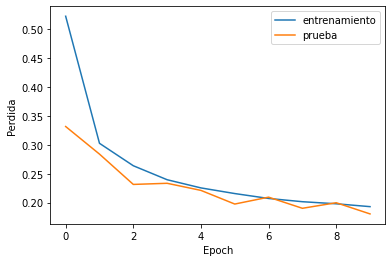

In [108]:
plt.xlabel('Epoch')
plt.ylabel('Perdida')
plt.plot(training_history.history['loss'], label='entrenamiento')
plt.plot(training_history.history['val_loss'], label='prueba')
plt.legend()

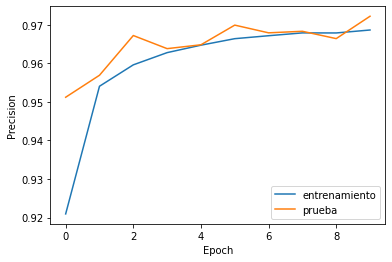

In [109]:
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.plot(training_history.history['accuracy'], label='entrenamiento')
plt.plot(training_history.history['val_accuracy'], label='prueba')
plt.legend()

In [110]:
%%capture
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train)

In [111]:
print('entramiento_perdida: ', train_loss)
print('entrenamiento_precision: ', train_accuracy)

entramiento_perdida:  0.16860134899616241
entrenamiento_precision:  0.9771333336830139


In [112]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_test_normalized, y_test)


In [113]:
print('contra el test')
print('test perdidas: ', validation_loss)
print('test_precision: ', validation_accuracy)

contra el test
test perdidas:  0.18051952123641968
test_precision:  0.9721999764442444


Guardar modelo para probar

In [114]:
model_name = 'digits_recognition_mlp.h5'
model.save(model_name, save_format='h5')

In [115]:
loaded_model = tf.keras.models.load_model(model_name)

In [116]:
predictions_one_hot = loaded_model.predict([x_test_normalized])

In [117]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (10000, 10)


In [118]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,3.359181e-06,1.042929e-05,4.311910e-04,5.257939e-04,9.009296e-08,2.264609e-05,4.110239e-10,9.988826e-01,1.502792e-05,1.088026e-04
1,3.564990e-04,1.144015e-03,9.961654e-01,2.346934e-04,5.058915e-08,3.637894e-06,1.269987e-03,1.803879e-06,8.240296e-04,7.984448e-10
2,8.334784e-05,9.796783e-01,2.562103e-03,4.004187e-04,2.149558e-03,1.204751e-04,5.424075e-04,8.087100e-03,6.227029e-03,1.492743e-04
3,9.963063e-01,7.424140e-05,3.385411e-04,3.555813e-06,1.134964e-04,6.954217e-05,1.801451e-03,1.172384e-03,2.609630e-05,9.435267e-05
4,9.842138e-05,1.778020e-06,6.788294e-05,8.666671e-06,9.810989e-01,4.657227e-05,8.517686e-05,3.831356e-04,9.695452e-06,1.819964e-02
...,...,...,...,...,...,...,...,...,...,...
9995,6.139330e-08,1.086911e-04,9.998030e-01,2.288095e-05,2.452746e-12,3.760727e-09,4.563448e-09,6.000416e-05,5.407925e-06,2.244671e-11
9996,2.970592e-08,4.071886e-04,4.984406e-05,9.985507e-01,4.396938e-08,8.706150e-04,2.227076e-10,2.037913e-05,6.238454e-06,9.489750e-05
9997,9.193912e-07,3.700990e-06,6.360423e-08,4.954688e-06,9.946824e-01,1.406533e-06,3.658673e-07,1.301832e-04,5.877671e-05,5.117186e-03
9998,9.304109e-04,1.065698e-05,2.142847e-06,2.198059e-04,5.608554e-07,9.955315e-01,3.288663e-04,2.398930e-04,2.710369e-03,2.571163e-05


In [119]:
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


Probando con el conjunto de digitos

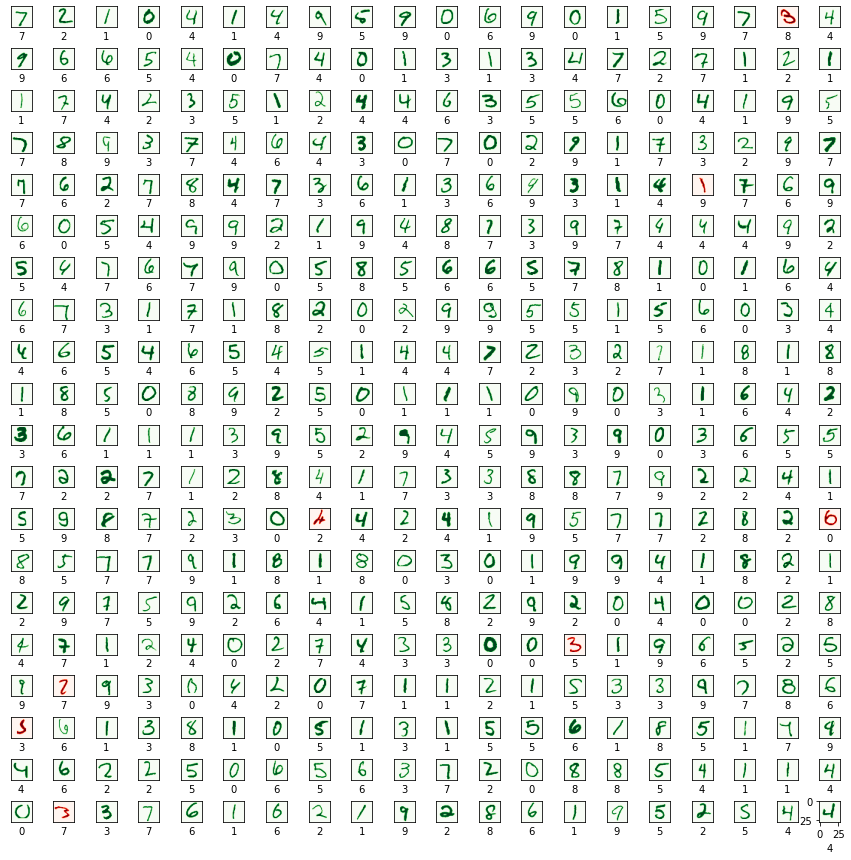

In [120]:
numbers_to_display = 400
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_test_normalized[plot_index], cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

Matriz de confusion

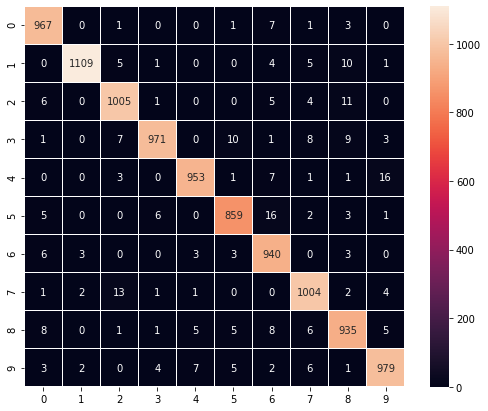

In [121]:
confusion_matrix = tf.math.confusion_matrix(y_test, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()